100%|██████████| 1484/1484 [00:45<00:00, 32.54it/s]


0.3669727899867168

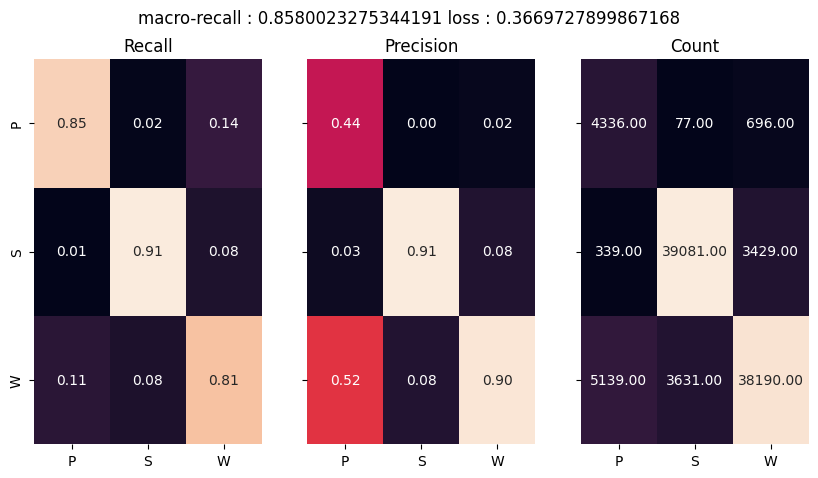

In [7]:
import torch
from lib.utils import load_raw_list,cms
from lib.datasets import Dataset2p0
from torch.utils.data import DataLoader
from torch.nn.functional import relu,one_hot,softmax
from lib.datasets import EEGDataset
from torch import nn
from lib.models import ResNet as MODEL

model = MODEL().cuda()
data_dir = 'test'

trainloader = DataLoader(Dataset2p0(dir=f'{data_dir}/train/',labels=f'{data_dir}/y_train.pt'),batch_size=64,shuffle=True)
devloader = DataLoader(Dataset2p0(dir=f'{data_dir}/test/',labels=f'{data_dir}/y_test.pt'),batch_size=64,shuffle=True)

model.load_state_dict(torch.load('branch/model.pt'))
from lib.utils import test_evaluation
criterion = nn.CrossEntropyLoss()
test_evaluation(devloader,model,criterion)

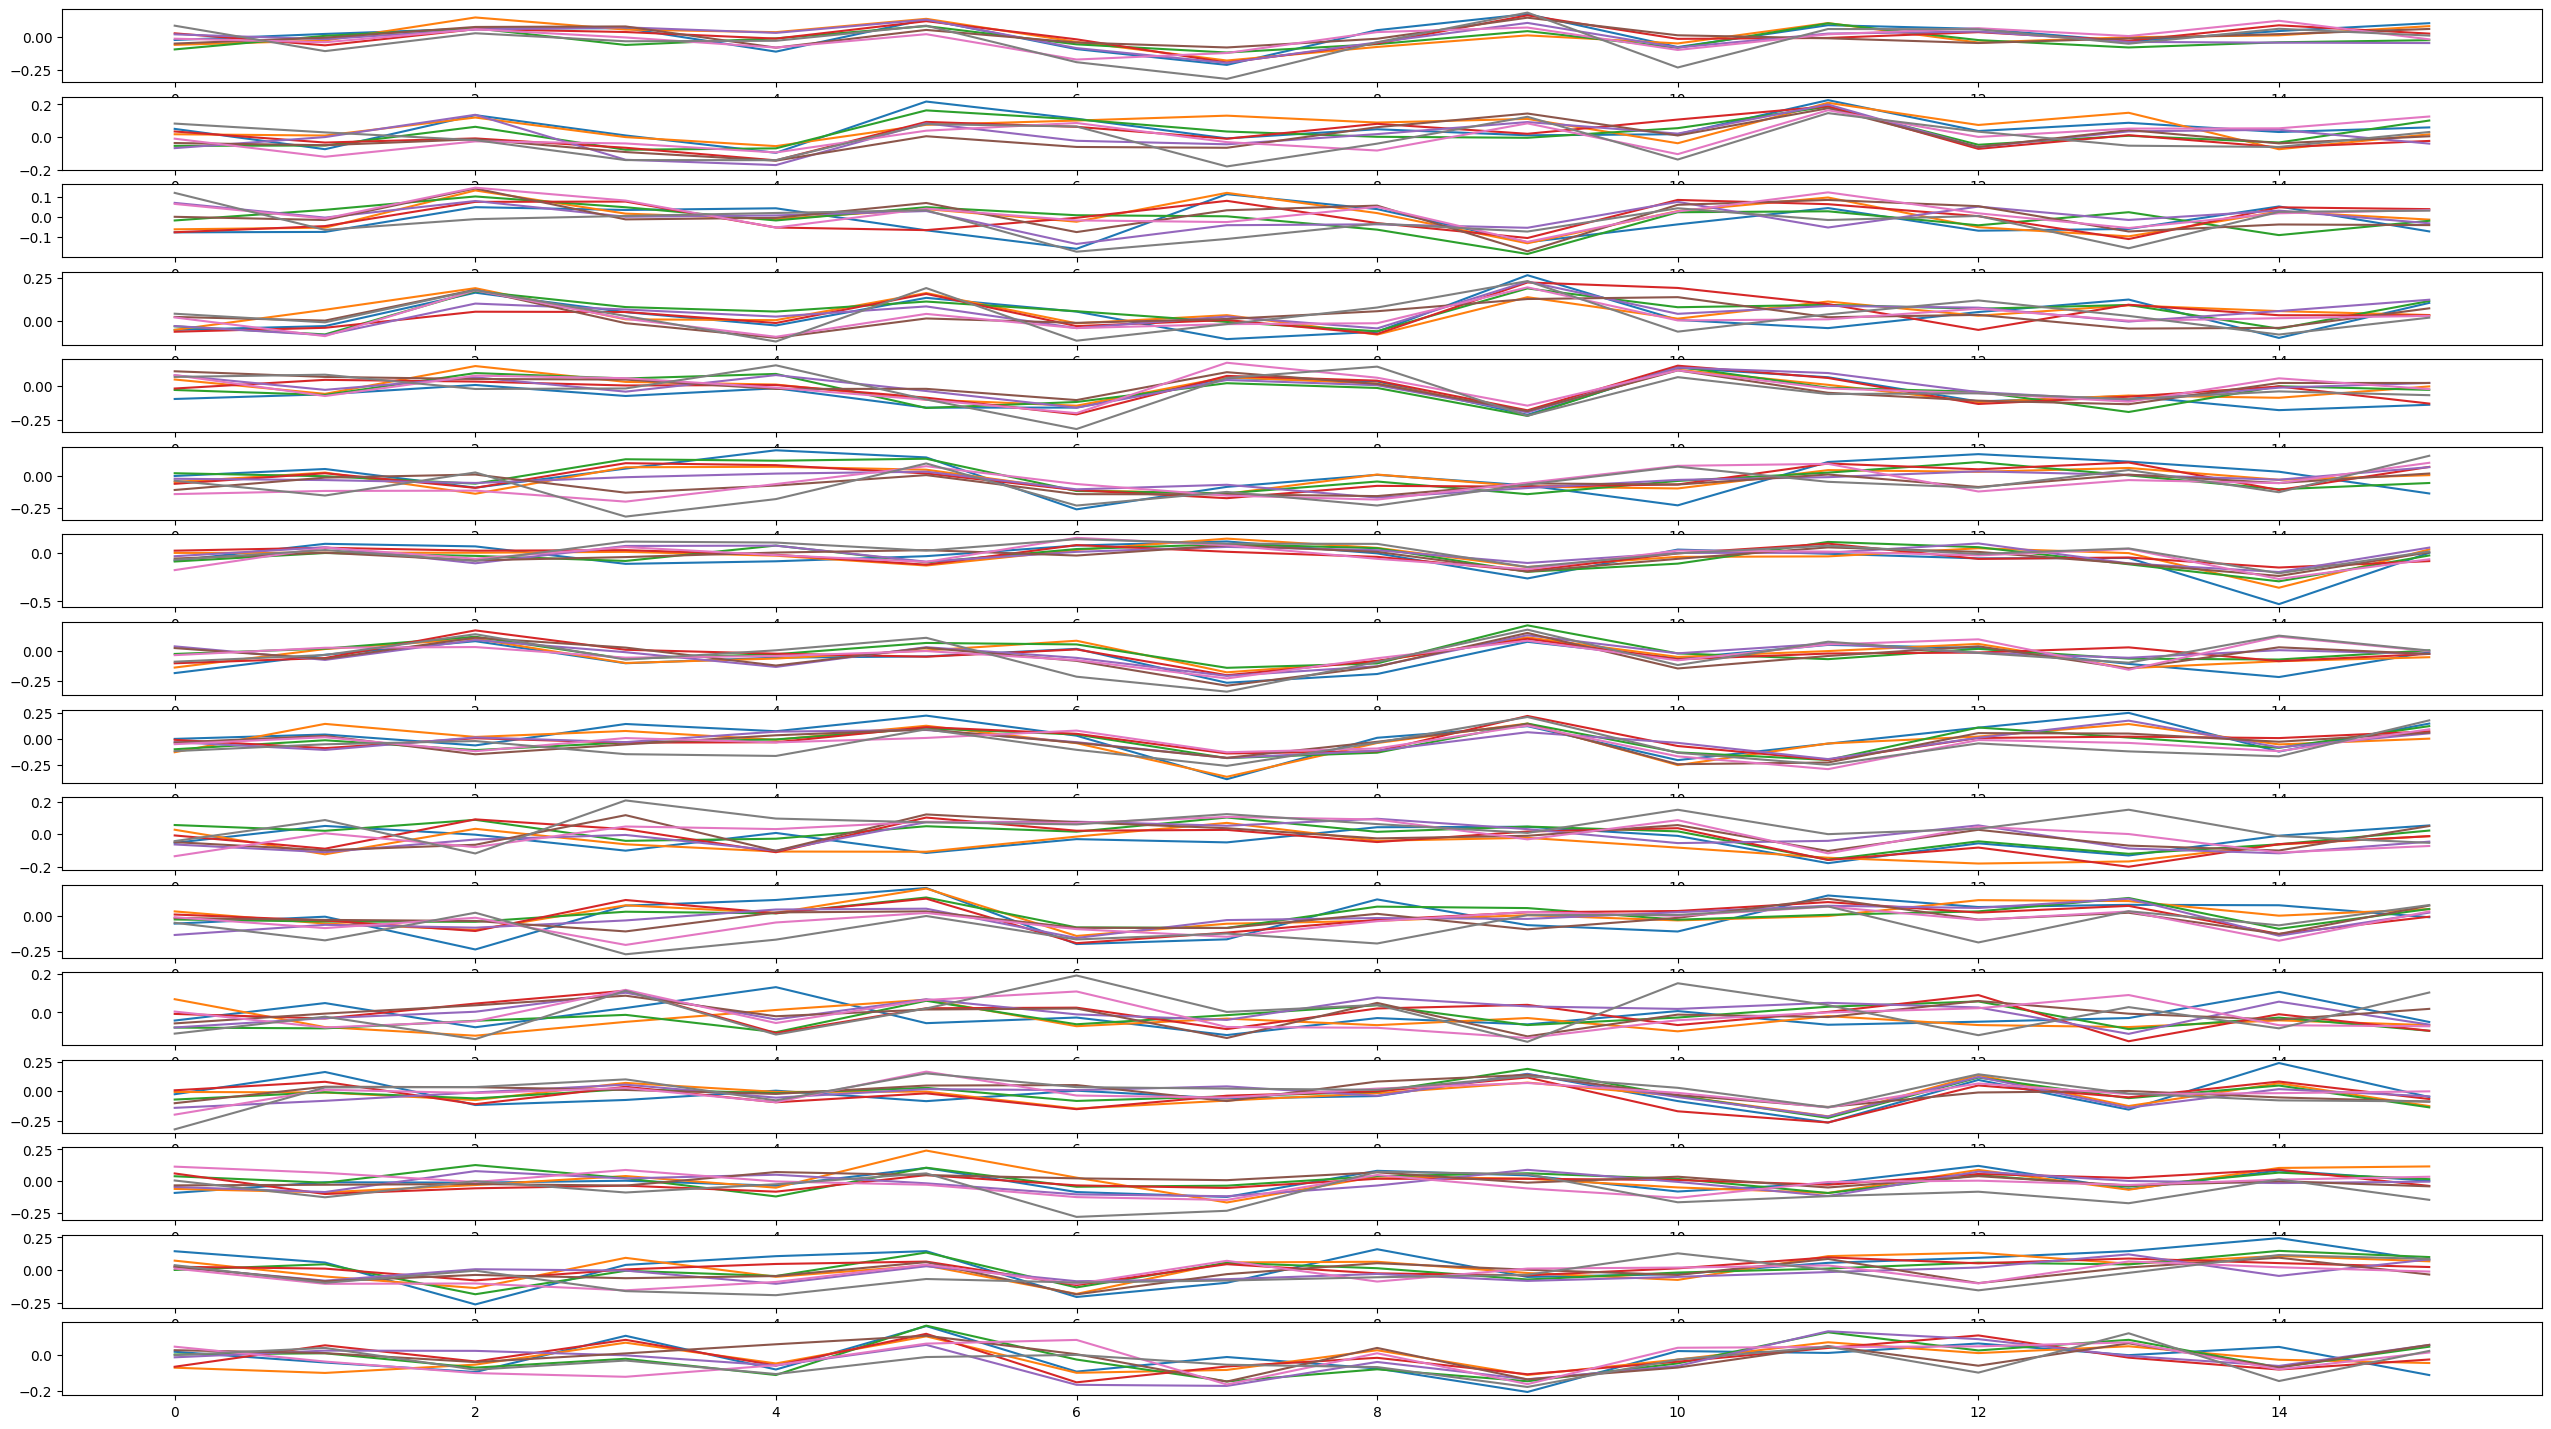

In [18]:
import matplotlib.pyplot as plt
weights = model.block3.c1.weight
fig,axes = plt.subplots(nrows=len(weights),ncols=1,figsize=(32,18))
for i in range(len(weights)):
    axes[i].plot(weights[i].squeeze().detach().cpu())
plt.savefig('figures/kernels.jpg',dpi=500)